# mjh_math Module Examples

Math utilities package - Basic math functions and geometry functions

In [ ]:
from user_library.mjh_math import (
    # basic_math
    normalize_angle,
    normalize_angle_half,
    get_decimal_places,
    round_to_decimal_places,
    # geometry
    get_obb_polygon,
    centerpos_from_frontcenter,
    calculate_obb_distance,
)
import numpy as np
import matplotlib.pyplot as plt

## 1. basic_math - Basic Math Functions

### 1.1 Angle Normalization

In [2]:
# normalize_angle: Normalize to [0, 360) range
print("normalize_angle examples:")
print(f"  450° → {normalize_angle(450)}°")
print(f"  -90° → {normalize_angle(-90)}°")
print(f"  720° → {normalize_angle(720)}°")

normalize_angle examples:
  450° → 90°
  -90° → 270°
  720° → 0°


In [3]:
# normalize_angle_half: Normalize to [-180, 180) range
print("normalize_angle_half examples:")
print(f"  270° → {normalize_angle_half(270)}°")
print(f"  -270° → {normalize_angle_half(-270)}°")
print(f"  180° → {normalize_angle_half(180)}°")

normalize_angle_half examples:
  270° → -90°
  -270° → 90°
  180° → -180°


### 1.2 Decimal Handling

Useful for resolving floating-point arithmetic errors.

In [4]:
# Floating-point arithmetic error examples
print("Floating-point arithmetic errors:")
print(f"  0.1 + 0.2 = {0.1 + 0.2}")
print(f"  -2 * 0.2 = {-2 * 0.2}")
print(f"  3 * 0.05 = {3 * 0.05}")

Floating-point arithmetic errors:
  0.1 + 0.2 = 0.30000000000000004
  -2 * 0.2 = -0.4
  3 * 0.05 = 0.15000000000000002


In [5]:
# get_decimal_places: Get number of decimal places
print("get_decimal_places examples:")
print(f"  0.2 → {get_decimal_places(0.2)} places")
print(f"  0.05 → {get_decimal_places(0.05)} places")
print(f"  1.0 → {get_decimal_places(1.0)} places")

get_decimal_places examples:
  0.2 → 1 places
  0.05 → 2 places
  1.0 → 0 places


In [6]:
# round_to_decimal_places: Round to match reference value's decimal places
print("round_to_decimal_places examples:")
print(f"  -2 * 0.2 = {-2 * 0.2} → {round_to_decimal_places(-2 * 0.2, 0.2)}")
print(f"  3 * 0.05 = {3 * 0.05} → {round_to_decimal_places(3 * 0.05, 0.05)}")

round_to_decimal_places examples:
  -2 * 0.2 = -0.4 → -0.4
  3 * 0.05 = 0.15000000000000002 → 0.15


## 2. geometry - Geometry Functions

OBB (Oriented Bounding Box) functions for vehicle collision detection in SUMO simulations

### 2.1 OBB Polygon Creation

In [7]:
# Create single OBB
poly = get_obb_polygon(x=0, y=0, width=2.0, length=5.0, angle_deg=0)
print(f"OBB bounds: {poly.bounds}")
print(f"OBB area: {poly.area}")

OBB bounds: (-2.5, -1.0, 2.5, 1.0)
OBB area: 10.0


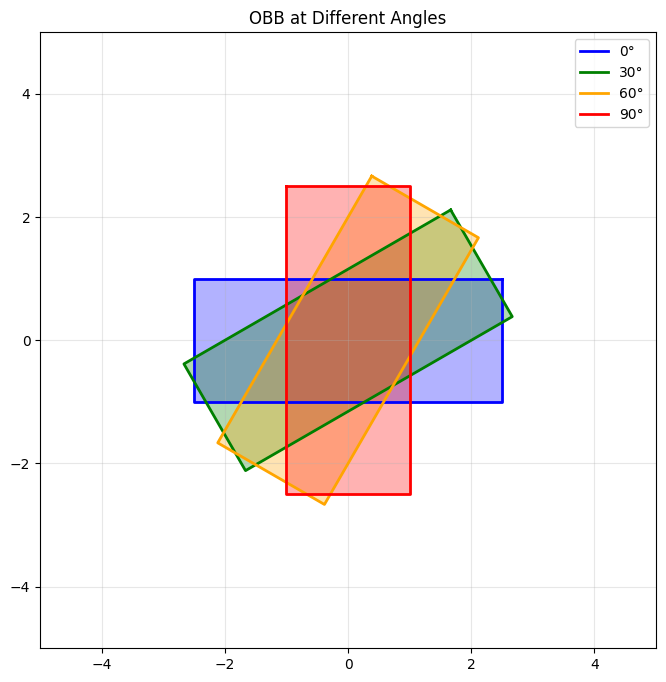

In [8]:
# Visualize OBBs at various angles
fig, ax = plt.subplots(figsize=(10, 8))

angles = [0, 30, 60, 90]
colors = ['blue', 'green', 'orange', 'red']

for angle, color in zip(angles, colors):
    poly = get_obb_polygon(x=0, y=0, width=2.0, length=5.0, angle_deg=angle)
    x, y = poly.exterior.xy
    ax.plot(x, y, color=color, linewidth=2, label=f'{angle}°')
    ax.fill(x, y, color=color, alpha=0.3)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('OBB at Different Angles')
plt.show()

### 2.2 SUMO Coordinate Conversion

SUMO uses front bumper center coordinates, so conversion to vehicle center is needed for OBB calculation.

In [9]:
# Front bumper center → Vehicle center conversion
front_x, front_y = 100, 50
length = 5.0

print("centerpos_from_frontcenter examples:")
for angle in [0, 45, 90, 180]:
    cx, cy = centerpos_from_frontcenter(front_x, front_y, length, angle)
    print(f"  {angle}°: ({front_x}, {front_y}) → ({cx:.2f}, {cy:.2f})")

centerpos_from_frontcenter examples:
  0°: (100, 50) → (97.50, 50.00)
  45°: (100, 50) → (98.23, 48.23)
  90°: (100, 50) → (100.00, 47.50)
  180°: (100, 50) → (102.50, 50.00)


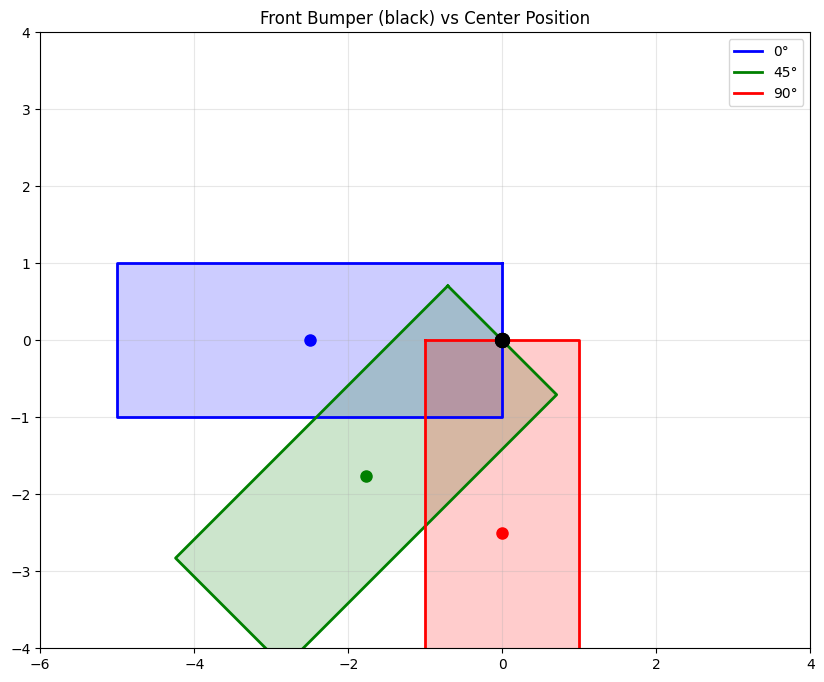

In [10]:
# Visualization: Front bumper vs Vehicle center
fig, ax = plt.subplots(figsize=(10, 8))

front_x, front_y = 0, 0
length, width = 5.0, 2.0

for angle, color in zip([0, 45, 90], ['blue', 'green', 'red']):
    cx, cy = centerpos_from_frontcenter(front_x, front_y, length, angle)
    poly = get_obb_polygon(cx, cy, width, length, angle)
    
    x, y = poly.exterior.xy
    ax.plot(x, y, color=color, linewidth=2, label=f'{angle}°')
    ax.fill(x, y, color=color, alpha=0.2)
    
    # Front bumper center marker
    ax.plot(front_x, front_y, 'ko', markersize=10)
    # Vehicle center marker
    ax.plot(cx, cy, 'o', color=color, markersize=8)

ax.set_xlim(-6, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('Front Bumper (black) vs Center Position')
plt.show()

### 2.3 OBB Distance Calculation

In [11]:
# 1:1 - Single OBB pair
obb1 = get_obb_polygon(0, 0, 2.0, 5.0, 0)
obb2 = get_obb_polygon(10, 0, 2.0, 5.0, 0)

dist = calculate_obb_distance(obb1, obb2)
print(f"1:1 distance: {dist:.2f} m")

1:1 distance: 5.00 m


In [12]:
# N:N - Pairwise distances (vectorized operation)
obbs1 = [get_obb_polygon(i*5, 0, 2, 5, 0) for i in range(5)]
obbs2 = [get_obb_polygon(i*5, 10, 2, 5, 0) for i in range(5)]

dists = calculate_obb_distance(obbs1, obbs2)
print(f"N:N distances: {dists}")

N:N distances: [8. 8. 8. 8. 8.]


In [13]:
# 1:N - Ego vehicle vs surrounding vehicles
ego = get_obb_polygon(0, 0, 2, 5, 0)
others = [get_obb_polygon(i*8, 0, 2, 5, 0) for i in range(1, 6)]

dists = calculate_obb_distance(ego, others)
print(f"1:N distances: {dists}")

1:N distances: [ 3. 11. 19. 27. 35.]


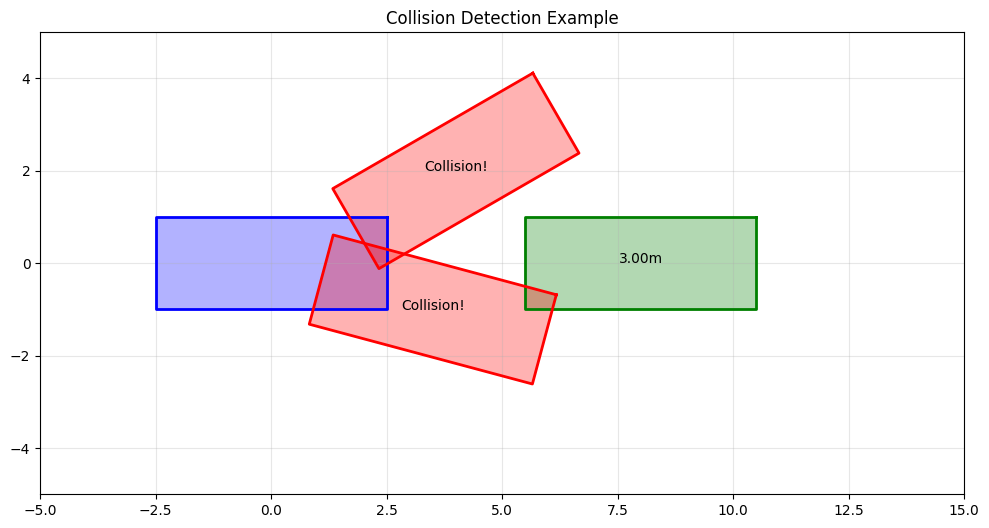

In [14]:
# Collision detection visualization
fig, ax = plt.subplots(figsize=(12, 6))

ego = get_obb_polygon(0, 0, 2, 5, 0)
others = [
    get_obb_polygon(8, 0, 2, 5, 0),       # Far
    get_obb_polygon(4, 2, 2, 5, 30),      # Close
    get_obb_polygon(3.5, -1, 2, 5, -15),  # Collision
]

# Ego vehicle
x, y = ego.exterior.xy
ax.plot(x, y, 'b-', linewidth=2, label='Ego')
ax.fill(x, y, color='blue', alpha=0.3)

# Surrounding vehicles
dists = calculate_obb_distance(ego, others)
for i, (other, dist) in enumerate(zip(others, dists)):
    color = 'red' if dist == 0 else 'green'
    x, y = other.exterior.xy
    ax.plot(x, y, color=color, linewidth=2)
    ax.fill(x, y, color=color, alpha=0.3)
    cx = other.centroid.x
    cy = other.centroid.y
    status = 'Collision!' if dist == 0 else f'{dist:.2f}m'
    ax.annotate(status, (cx, cy), ha='center', fontsize=10)

ax.set_xlim(-5, 15)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_title('Collision Detection Example')
plt.show()